In [101]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer  #==> convert text in to numbers...it count frequency of each word and make a numerical feature that a model can understand
from sklearn.model_selection import train_test_split #==> dvide dataset into training set and test Set
from sklearn.naive_bayes import MultinomialNB #==> type of Naive Bayes that perform well on discreate data

#to save or load trained models
import joblib
import pickle #more flexible

In [156]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")
display(data.head())

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [115]:
data.isnull().sum()
# data.to_csv("language.txt", sep=",", index=False)
# print(data.head())

Text        0
language    0
dtype: int64

In [116]:
print(data.nunique())
# dataset contains 22 languages with 1000 sentences from each language
print(data.shape)

Text        21859
language       22
dtype: int64
(22000, 2)


In [117]:
x=np.array(data['Text'])
y=np.array(data['language'])

In [118]:
# creating object of countvectorizer(convert text into numbers)
cv = CountVectorizer()
 # convet text in to numbers
X=cv.fit_transform(x)
# test_size=0.001: specify 0.1% data for testing
# random_state=100: this is used to set seed to ensure same split each time when the code is run.
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.001, random_state=100)

# Save the fitted vectorizer using joblib
joblib.dump(cv, 'Models/Vectorizer.joblib')

['Models/Vectorizer.joblib']

In [119]:
import os

#==> this show that the object is correctly saved
print(os.path.exists('Models/Vectorizer.joblib')) 

True


In [120]:
model1=MultinomialNB()

#==> in this we are training MultinomialNB model on features and labels
model1.fit(X_train,y_train) 

MultinomialNB()

In [121]:
# calculate accuracy on unseen test data
# Accuracy = (True Predictions / Total Predictions) × 100
accuracy=model1.score(X_test, y_test)
accuracy*100

100.0

In [122]:
#feature log Probabilities: check for log probability in each language
# check which word exist more frequently in any language
# High Log Probability for a word means that particular word occur more 
# frequently in any lngyage(class)

feature_log_probabilities=model1.feature_log_prob_
print("Log Probabilities",feature_log_probabilities)

Log Probabilities [[-12.0623899  -12.75553708 -12.75553708 ... -12.75553708 -12.75553708
  -12.75553708]
 [-12.60973279 -12.60973279 -12.60973279 ... -12.60973279 -12.60973279
  -12.60973279]
 [-12.70950803 -12.01636085 -12.70950803 ... -12.70950803 -12.70950803
  -12.70950803]
 ...
 [-12.02734363 -12.72049081 -12.72049081 ... -12.72049081 -12.72049081
  -12.72049081]
 [-12.00601676 -12.69916394 -12.69916394 ... -12.69916394 -12.69916394
  -12.69916394]
 [-12.74922508 -12.74922508 -12.74922508 ... -12.74922508 -12.74922508
  -12.74922508]]


In [123]:
joblib.dump(model1,'Models/Language_detector_model.joblib')

['Models/Language_detector_model.joblib']

In [124]:
model_NB=joblib.load('Models/Language_detector_model.joblib')
cv_NB=joblib.load("Models/Vectorizer.joblib")

# print(cv_NB.get_feature_names_out()[:150])

In [130]:
user_input=input("Enter your text: ")

# cv_NB this will convert user input to numbers aand toarray() will convert numbers to an array
convert_user_input=cv_NB.transform([user_input])
output=model_NB.predict(convert_user_input)

# prediction=str(output)

print("User: ",user_input)
print("System Prediction",output)

User:  என் பெயர் சாரா.
System Prediction ['Tamil']


In [131]:
# Visualization

from matplotlib import pyplot as plt
import seaborn as sns

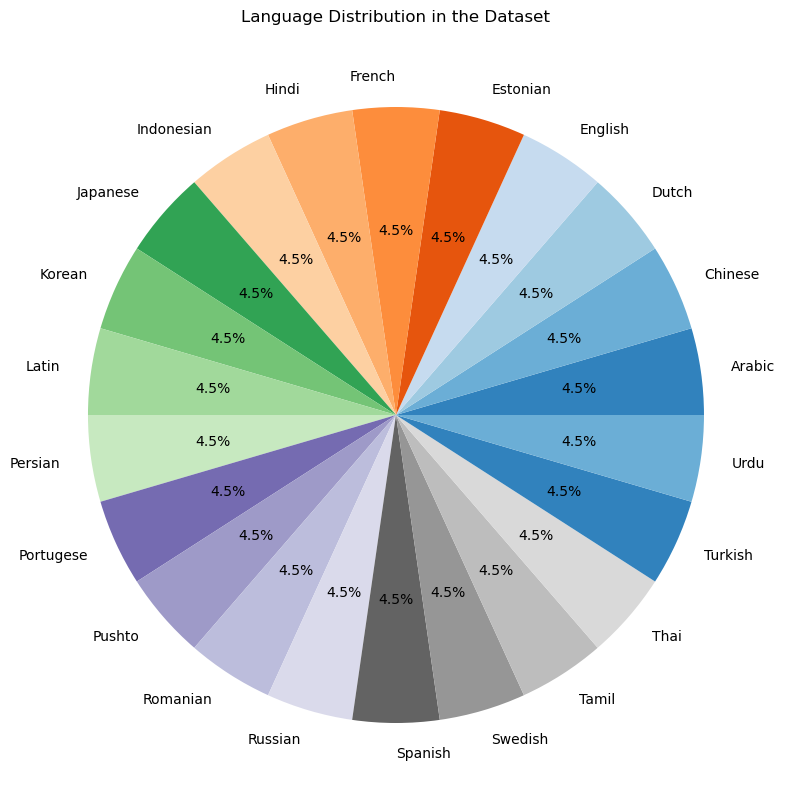

In [139]:
# plt.figure(figsize=(30,10))
# sns.countplot(x='language', data=data, palette='tab20c')
# plt.title("Language Occurences")
# plt.xticks(rotation=45)
# plt.show()
labels, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(10, 10))
palette_color = sns.color_palette('tab20c')
plt.pie(counts, autopct='%1.1f%%', labels=labels, colors=palette_color)
plt.title('Language Distribution in the Dataset',fontsize=12)
plt.show()  

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = model1.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)

# Plot the confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [140]:
# logistic Regression


# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [141]:
model2.fit(X_train,y_train)

LogisticRegression()

In [142]:
model2.score(X_test,y_test)

1.0

In [143]:
joblib.dump(model2,'Models/language_detector_LR.joblib')
# joblib.dump(model2,'Models/language_detector_LR.pkl')

['Models/language_detector_LR.joblib']

In [144]:
model_LR=joblib.load('Models/language_detector_LR.joblib')
cv_LR=joblib.load('Models/Vectorizer.joblib')

In [147]:
user_input=input("Enter your text: ")

# cv_NB this will convert user input to numbers aand toarray() will convert numbers to an array
convert_user_input=cv_LR.transform([user_input])
output=model2.predict(convert_user_input)

# prediction=str(output)

print("User: ",user_input)
print("System Prediction",output)

User:  என் பெயர் சாரா.
System Prediction ['Japanese']


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix

In [155]:
# Print Performance Metrics
print(f'Accuracy score is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')
print(f'Precision score is: {np.round(precision_score(y_test, y_pred, average="weighted"), decimals=3)*100}%')
print(f'Recall score is: {np.round(recall_score(y_test, y_pred, average="weighted"), decimals=3)*100}%')
print(f'F1 score is: {np.round(f1_score(y_test, y_pred, average="weighted"), decimals=3)*100}%')    

Accuracy score is: 100.0%
Precision score is: 100.0%
Recall score is: 100.0%
F1 score is: 100.0%
